## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [67]:
# Checking the number of mice.
unique_mice_count = len(merged_data["Mouse ID"].unique())
unique_mice_count

249

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = duplicate_mouse_ids[["Mouse ID", "Timepoint"]]
duplicate_mice

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_clean = len(clean_data["Mouse ID"].unique())
unique_mice_count_clean

249

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = clean_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumour volume. 
mean = grouped_data["Tumour Volume (mm3)"].mean()
median = grouped_data["Tumour Volume (mm3)"].median()
variance = grouped_data["Tumour Volume (mm3)"].var()
standard_deviation = grouped_data["Tumour Volume (mm3)"].std()
sem = grouped_data["Tumour Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean,
"Median": median,
"Variance": variance,
"Standard Deviation": standard_deviation,
"SEM": sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_data = clean_data.groupby(["Drug Regimen"]).agg({"Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregated_data

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

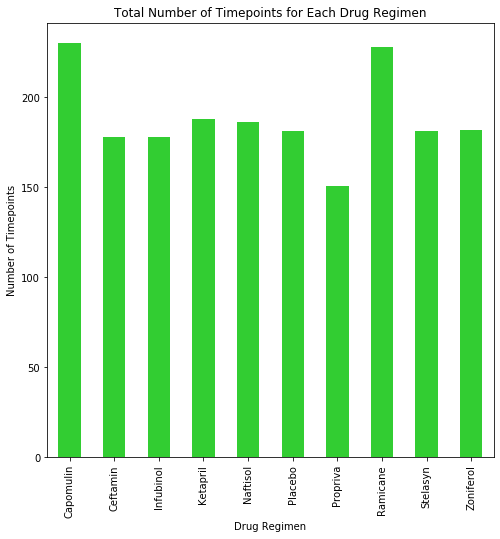

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Group the clean data by Drug Regimen and count the number of timepoints for each Drug Regimen
timepoints_count = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"]

#Create the bar chart using Pandas
timepoints_count.plot(kind="bar", color="limegreen", title="Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

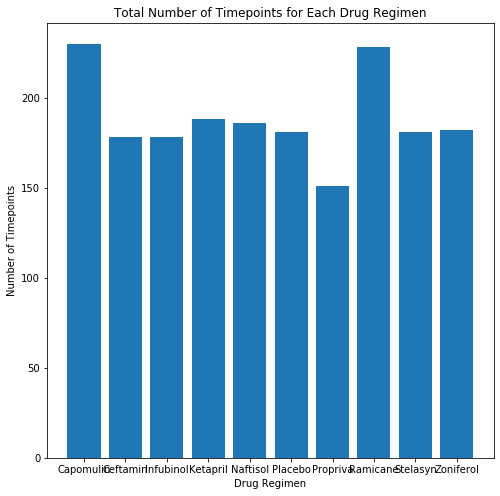

In [75]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Group the clean data by Drug Regimen and count the number of timepoints for each Drug Regimen
timepoints_count = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"]

#Create the bar chart using Pyplot
plt.bar(timepoints_count.index, timepoints_count.values, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.show()

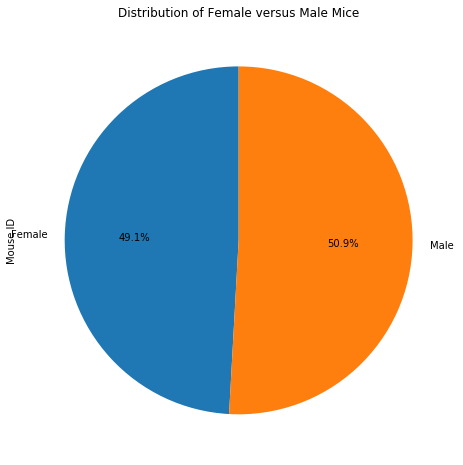

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Group the clean data by Sex and count the number of mice for each Sex
mice_count = clean_data.groupby(["Sex"]).count()["Mouse ID"]

#Plot the mice count using a pie plot
mice_count.plot(kind="pie", autopct='%1.1f%%', startangle=90, title="Distribution of Female versus Male Mice")
plt.show()

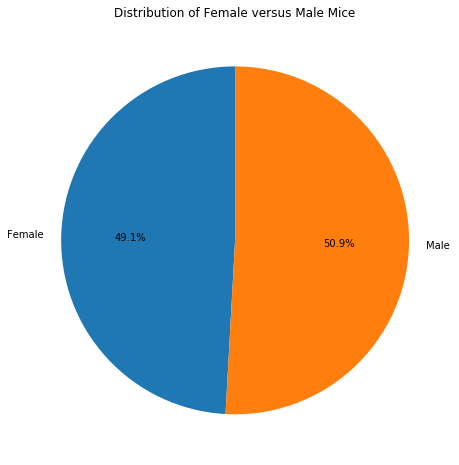

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the clean data by Sex and count the number of mice for each Sex
mice_count = clean_data.groupby(["Sex"]).count()["Mouse ID"]

# Plot the mice count using a pie plot
plt.pie(mice_count.values, labels=mice_count.index, autopct='%1.1f%%', startangle=90)

# Add a title to the plot
plt.title("Distribution of Female versus Male Mice")

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") |
(clean_data["Drug Regimen"] == "Ramicane") |
(clean_data["Drug Regimen"] == "Infubinol") |
(clean_data["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = filtered_data.groupby(["Mouse ID"]).max()["Timepoint"]
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
final_tumour_volume = max_timepoint.merge(filtered_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumour_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_volume_data = []
total_outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumour volumes
    tumour_volume_data.append(final_tumour_volume.loc[final_tumour_volume["Drug Regimen"] == drug, ["Tumour Volume (mm3)"]])

for i in range(len(treatments)):
    q3, q1 = np.percentile(tumour_volume_data[i], [75 ,25])
    lowerq = q1
    upperq = q3
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_data = tumour_volume_data[i]
    outlier_occupancy = outlier_data.loc[(outlier_data['Tumour Volume (mm3)'] < lower_bound) | (outlier_data['Tumour Volume (mm3)'] > upper_bound)]

    total_outliers.append(outlier_occupancy)

    if len(outlier_occupancy) > 0:
        print(f'Potential outliers for {treatments[i]}: {outlier_occupancy["Tumour Volume (mm3)"].values}')

Potential outliers for Infubinol: [36.3213458]


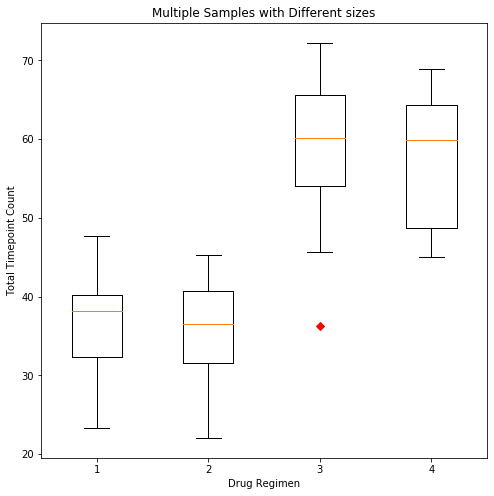

In [85]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
data = []
for i in range(len(tumour_volume_data)):
    data.append(tumour_volume_data[i]["Tumour Volume (mm3)"])
plt.rcParams["figure.figsize"] = (8,8)
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')    
ax7.boxplot(data, 0,'rD')
plt.ylabel('Total Timepoint Count')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

In [91]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin',:]
capomulin.groupby('Mouse ID').max().head(15)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,45,45.651331,2
b742,Capomulin,Male,7,21,45,45.000000,0
f966,Capomulin,Male,16,17,20,45.000000,0
g288,Capomulin,Male,3,19,45,46.304003,1
g316,Capomulin,Female,22,22,45,46.809225,2
i557,Capomulin,Female,1,24,45,47.685963,1
i738,Capomulin,Female,23,20,45,45.595685,2
j119,Capomulin,Female,7,23,45,48.158209,1
j246,Capomulin,Female,21,21,35,46.408361,1


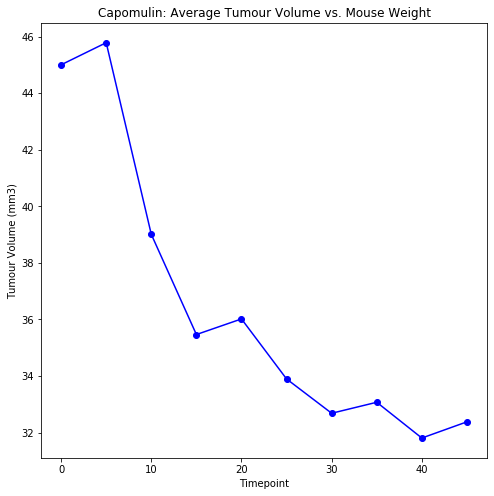

In [95]:
Mouse_ID = 'r554'

cap_sub = pd.DataFrame(clean_data.loc[clean_data['Mouse ID'] == Mouse_ID,:])
cap_sub[["Timepoint", "Tumour Volume (mm3)"]]
x_axis = cap_sub['Timepoint']

plt.plot(x_axis, cap_sub['Tumour Volume (mm3)'], marker='o', color='blue')
plt.title('Capomulin: Average Tumour Volume vs. Mouse Weight')
plt.ylabel('Tumour Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()

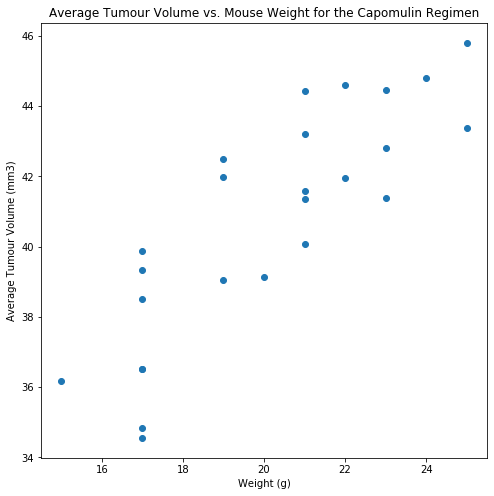

In [99]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

# Group the data by Mouse ID and calculate the average tumour volume and weight for each mouse
grouped_data = capomulin.groupby('Mouse ID').mean()

# Plot the average tumour volume vs. mouse weight
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumour Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title('Average Tumour Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumour volume is 0.84


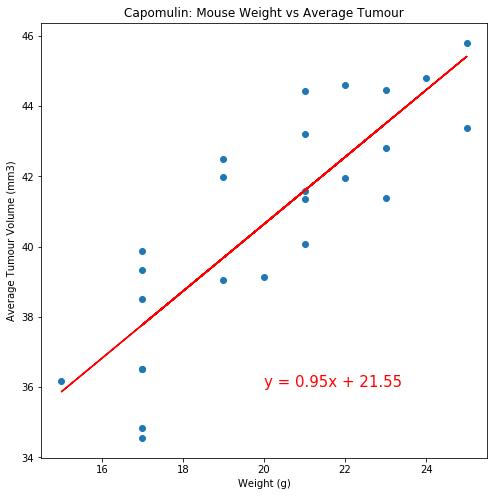

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(grouped_data['Weight (g)'], grouped_data['Tumour Volume (mm3)'])[0]

# Display the correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumour volume is {correlation:.2f}")

# Perform a linear regression on the relationship between mouse weight and average tumour volume
slope, intercept, rvalue, pvalue, stderr = st.linregress(grouped_data['Weight (g)'], grouped_data['Tumour Volume (mm3)'])

# Use the regression to create a line of best fit
regression_values = grouped_data['Weight (g)'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression line on top of the scatter plot
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumour Volume (mm3)'])
plt.plot(grouped_data['Weight (g)'], regression_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title('Capomulin: Mouse Weight vs Average Tumour')
plt.show()